In [57]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

In [4]:
df=pd.read_csv("Churn.csv")
df.sample(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5033,7298-IZWLY,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,19.4,No
32,6827-IEAUQ,Female,0,Yes,Yes,27,Yes,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Mailed check,66.15,1874.45,No
2692,5445-GLVOT,Female,0,No,No,22,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.80,1049.05,No
5798,4548-SDBKE,Female,0,No,No,5,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.20,474.8,Yes
5375,9637-EIHEQ,Female,0,No,No,1,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,50.80,50.8,Yes
4265,2632-UCGVD,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.05,6871.9,Yes


In [5]:
df.drop("customerID",axis='columns',inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [14]:
df1=df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [15]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\heman\AppData\Local\Temp\ipykernel_5196\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

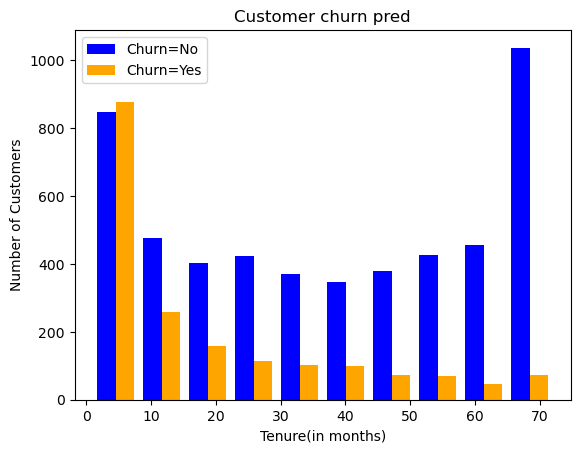

In [22]:
churn_no=df1[df1.Churn=="No"].tenure
churn_yes=df1[df1.Churn=="Yes"].tenure

plt.hist([churn_no,churn_yes],color=['blue','orange'],label=['Churn=No','Churn=Yes'])
plt.xlabel('Tenure(in months)')
plt.ylabel('Number of Customers')
plt.title("Customer churn pred")
plt.legend()
plt.show()

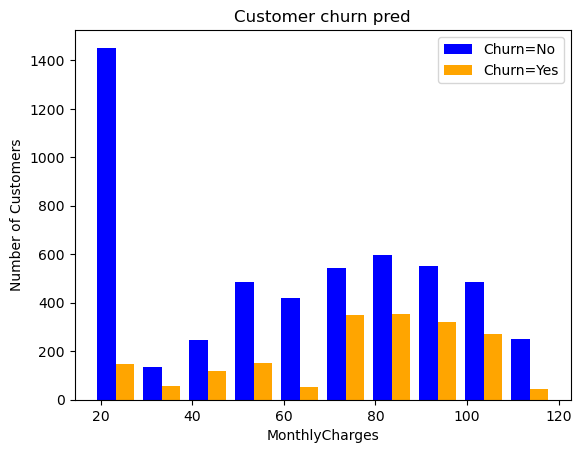

In [23]:
churn_no=df1[df1.Churn=="No"].MonthlyCharges
churn_yes=df1[df1.Churn=="Yes"].MonthlyCharges

plt.hist([churn_no,churn_yes],color=['blue','orange'],label=['Churn=No','Churn=Yes'])
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title("Customer churn pred")
plt.legend()
plt.show()


In [24]:
df1.sample(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2161,Female,0,No,No,2,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.80,160.75,Yes
3477,Female,0,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.15,1345.75,No
6016,Male,0,No,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,108.45,7176.55,Yes
939,Female,0,No,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,320.45,No
5268,Male,0,Yes,Yes,69,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),86.90,6194.10,No
4260,Male,0,Yes,Yes,42,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,73.15,3088.25,No
6322,Female,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.00,303.15,Yes


In [35]:
for column in df1:
    print(column," : ",df[column].unique(),":",df[column].dtypes)

gender  :  ['Female' 'Male'] : object
SeniorCitizen  :  [0 1] : int64
Partner  :  ['Yes' 'No'] : object
Dependents  :  ['No' 'Yes'] : object
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] : int64
PhoneService  :  ['No' 'Yes'] : object
MultipleLines  :  ['No phone service' 'No' 'Yes'] : object
InternetService  :  ['DSL' 'Fiber optic' 'No'] : object
OnlineSecurity  :  ['No' 'Yes' 'No internet service'] : object
OnlineBackup  :  ['Yes' 'No' 'No internet service'] : object
DeviceProtection  :  ['No' 'Yes' 'No internet service'] : object
TechSupport  :  ['No' 'Yes' 'No internet service'] : object
StreamingTV  :  ['No' 'Yes' 'No internet service'] : object
StreamingMovies  :  ['No' 'Yes' 'No internet service'] : object
Contract  :  ['Month-to-month' 'One year' 'Two year'] : object
PaperlessBilling  :  ['Yes

In [37]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\heman\AppData\Local\Temp\ipykernel_5196\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\heman\AppData\Local\Temp\ipykernel_5196\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [38]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1933,Male,0,No,No,20,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,415.90,No
5601,Female,0,Yes,Yes,35,No,No,DSL,No,No,No,Yes,Yes,No,One year,No,Mailed check,40.90,1383.60,No
5977,Male,0,No,No,57,Yes,No,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic),20.65,1125.60,No
4991,Female,0,No,No,58,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.45,6145.85,Yes
4429,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),79.70,5743.30,No


In [40]:
for column in df1:
    print(column,df1[column].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ['No' 'Yes']


In [41]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']


In [42]:
for col in yes_no_columns:
    df1[col].replace({'No':0,"Yes":1},inplace=True)

C:\Users\heman\AppData\Local\Temp\ipykernel_5196\2177330218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'No':0,"Yes":1},inplace=True)


In [43]:
df1.sample(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2797,Male,0,0,0,3,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,100.95,329.95,1
133,Male,0,0,0,1,0,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,35.45,35.45,1
466,Male,1,1,0,64,1,1,Fiber optic,0,0,1,1,1,1,Two year,0,Electronic check,102.10,6538.45,0
6016,Male,0,0,0,68,1,1,Fiber optic,0,1,1,1,1,1,One year,0,Electronic check,108.45,7176.55,1
3134,Female,0,1,1,36,1,0,No,0,0,0,0,0,0,Month-to-month,0,Bank transfer (automatic),19.20,702.90,0
3531,Female,0,0,0,16,1,0,No,0,0,0,0,0,0,One year,0,Credit card (automatic),19.35,295.55,0
3369,Female,1,0,0,11,1,1,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,55.60,580.80,0


In [45]:
df1['gender'].replace({'Male':1,"Female":0},inplace=True)

C:\Users\heman\AppData\Local\Temp\ipykernel_5196\3136148464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Male':1,"Female":0},inplace=True)


In [46]:
for column in df1:
    print(column,df1[column].unique())

gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService [0 1]
MultipleLines [0 1]
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling [1 0]
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [0 1]


In [48]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [49]:
df2.sample(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
697,1,0,1,1,3,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1207,0,0,0,1,9,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
6250,0,0,1,0,69,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
1424,0,0,0,1,48,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3180,0,0,0,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5185,0,0,0,1,50,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
6208,1,0,1,0,61,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0


In [50]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [52]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [53]:
df2.sample(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1171,1,0,1,0,0.830986,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1197,1,0,1,0,0.197183,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4341,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3722,1,0,0,1,0.309859,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
2084,1,0,0,1,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1929,1,0,1,1,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1133,1,0,0,1,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [54]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [73]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.8253
Epoch 2/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8239
Epoch 3/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8232
Epoch 4/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8273
Epoch 5/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8239
Epoch 6/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8236
Epoch 7/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8279
Epoch 8/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8263
Epoch 9/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8232
Epoch 10/50
154/154 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8283

In [78]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7682


[0.5258881449699402, 0.7682464718818665]

In [82]:
y_pred=model.predict(X_test)

66/66 [==============================] - 0s 2ms/step


In [94]:
yp=[]
for pred in y_pred:
    if pred>=0.5:
        yp.append(1)
    else:
        yp.append(0)

In [83]:
import seaborn as sn

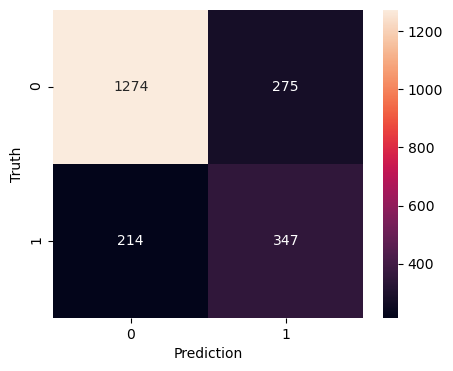

In [95]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=yp)
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()